In [ ]:
from IPython.display import HTML

HTML("""
<style>
/* tighten heading–paragraph gap */
h1, h2, h3, h4, h5, h6 { margin-bottom: 0.25rem; }

/* tighten gap above any paragraph that follows a heading */
h1 + p, h2 + p, h3 + p, h4 + p, h5 + p, h6 + p { margin-top: 0.25rem; }

/* justify body text */
p { text-align: justify; }
</style>
""")


# Monitoring Biodiversity with Data Cubes: Techniques and Applications for Open Science

**Sandra MacFadyen** (macfadyen@sun.ac.za)

### Ecological Complexity and Biodiversity Mini-School
Hosted by the [National Institute for Theoretical and Computational Sciences](https://nithecs.ac.za/) (NITheCS) through the Complexity in Biological Systems (E5) research programme, this four-part Mini-school—under Work Package 1: Ecological Complexity and Biodiversity—equips participants with practical and conceptual skills to harness the power of environmental data cubes for biodiversity monitoring and ecological modelling.  

The course is designed for postgraduate students, early-career researchers, conservation professionals, and environmental data scientists interested in open, scalable, and reproducible workflows. It introduces participants to the use of multi-dimensional spatiotemporal data structures—known as "Data Cubes"—to monitor ecological patterns and processes across space and time. By combining open-access species-occurrence records from the [Global Biodiversity Information Facility](https://www.gbif.org/) (GBIF), environmental, and trait data with cloud-based tools like [Google Earth Engine](https://earthengine.google.com/) through [Google Colab](https://colab.google/), participants will learn how to build and apply biodiversity data cubes for analytical and decision-support purposes.
Rooted in the principles of Open Science, this Mini-school emphasises transparency, accessibility, and collaborative research. Each session aligns with one or more of the UN [Sustainable Development Goals](https://sdgs.un.org/goals) (SDGs), highlighting the societal relevance of biodiversity informatics.


### Work Package 1: Ecological Complexity and Biodiversity
This Mini-school is presented as part of Work Package 1 (WP1): Ecological Complexity and Biodiversity. WP1 explores how biodiversity patterns and ecological processes emerge, interact, and change across spatial, temporal, and biological scales. It aims to develop quantitative frameworks and open tools to better understand and monitor biodiversity in a changing world.
WP1 is structured around five core objectives:

1.  **Biodiversity Entropy and Symmetry Across Scales**: Develop a unified theoretical framework to harmonise biodiversity metrics across scales, reducing bias and exploring eco-evolutionary processes through the lens of entropy and symmetry.
2.	**Structural Emergence in Complex Adaptive Networks**: Investigate the stability, resilience, and emergent properties of adaptive ecological networks, from microbiomes to food webs, in response to both internal dynamics and external environmental shifts.
3.	**Biodiversity Dynamics in Protected Landscapes**: Quantify, model, and map biodiversity—from genes to ecosystems—across protected areas to understand ecological functioning and inform conservation policy and planning.
4.	**Spatiotemporal Dynamics and Adaptive Interactions in Ecosystems**: Model species distributions, biome transitions, and ecological disequilibria under climate change, using biodiversity metrics, movement data, and evolutionary game theory to explore adaptive interactions.
5.	**Innovative Computational Tools for Biodiversity Monitoring**: Develop open, scalable software tools—including a Biodiversity Informatics Hub and smart sensor systems—to support long-term biodiversity monitoring in African landscapes. This also includes building a research network across African protected areas to co-design training and capacity-building tailored to regional conservation needs.

This Mini-school contributes directly to objectives 3, 4, and 5.


### Biodiversity
Biodiversity—the variety of life on Earth—is the foundation of ecosystem health and resilience. It encompasses the diversity of genes, species, and ecosystems, and includes the complex interactions among organisms and their environments. This variety supports essential ecosystem functions such as nutrient cycling, pollination, and climate regulation, making biodiversity critical not only for nature but also for human well-being.
Biodiversity operates across multiple dimensions and scales:

-   **Composition**, **structure**, and **function** are key facets of biodiversity. Composition includes the identity and variety of species and genes present. Structure refers to the spatial organisation of biodiversity—species abundance, distribution patterns, and habitat arrangement. Function encompasses ecological processes and interactions such as energy flow and food web dynamics.
-   **Genetic diversity** refers to the variation of genes within species, enabling populations to adapt to changing conditions.
-   **Species diversity** reflects the number and variety of species in a given ecosystem or region.
-   **Ecosystem diversity** captures the range of different habitats—such as forests, wetlands, savannas, and coral reefs—that sustain life and ecosystem services.


Global threats like habitat loss, climate change, invasive species, and land degradation are causing rapid biodiversity declines. Monitoring biodiversity change across appropriate spatial and temporal scales has therefore become an urgent global priority. However, to respond effectively, we need globally relevant, standardised and scalable solutions that can track biodiversity patterns over time, inform conservation policy, and support ecosystem management.


### **Practical Session 3: Ecological Modelling with Data Cubes** 
> In this hands-on session, participants will explore analytical approaches for modelling species distributions and environmental associations using biodiversity data cubes. Focusing on SDG 13 (Climate Action), the session will guide participants in investigating climate-related biodiversity responses and potential adaptation strategies.
By the end of the session, participants will be able to:
> 
> 1.	Construct a biodiversity data cube using open-access species occurrence data from GBIF, processed via Google Colab and Earth Engine.
> 2.	Visualise ecological patterns interactively using spatial dashboards and maps.
> 3.	Analyse species diversity in relation to climatic and environmental variables, such as rainfall, temperature, and elevation, using summary statistics and visualisations.
> 
> This session bridges computational ecology with applied conservation science, demonstrating how data-driven tools can inform real-world biodiversity management.


---
#### 1.	SETUP
> This section prepares the working environment for the data cube analysis. It ensures that all necessary packages are installed and available, initializes access to external services (e.g. Google Colab and Earth Engine), and connects to storage locations where datasets are kept or generated.


##### 1.2.	Install packages
Begin by installing the required Python libraries used throughout the workflow. These include geospatial, data science, and biodiversity informatics packages essential for data processing, analysis, and visualization.


In [ ]:
# -- Install core libraries (5–6 min)
!pip -q install geopandas folium geemap earthengine-api pygbif xarray rioxarray rasterio netcdf4 scikit-learn matplotlib_scalebar contextily

In [ ]:
# !pip install google.colab

In [1]:
# !pip install localtileserver
# !pip install xarray_leaflet

##### 1.3.	Load packages
Once installed, the relevant packages are imported into the working session. This step makes their functions available for use in the script and ensures compatibility between modules.


In [1]:
# ‑‑ Imports
import io
import os
import zipfile
import requests
import time   # polite pause between calls

import pandas as pd
import geopandas as gpd
import numpy as np
import xarray as xr
import folium, branca
import ee, geemap
import matplotlib.pyplot as plt
import contextily as cx # optional: adds basemap
import rasterio
import localtileserver

from io import BytesIO
from sklearn.linear_model import LinearRegression
# from google.colab import files
from pygbif import occurrences
from shapely.geometry import box, Polygon
from matplotlib_scalebar.scalebar import ScaleBar  # optional
from matplotlib.colors import LinearSegmentedColormap, Normalize

from rasterio.transform import from_origin
from rasterio.features import rasterize, geometry_mask
from rasterio.plot import show 

c:\Users\macfadyen\AppData\Local\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


##### 1.4.	Initialise packages
Some packages require additional setup or authentication steps—such as logging in to Google services or initializing Earth Engine—to enable access to cloud-based resources and tools.


In [ ]:
# -- Initialise Google Earth Engine (requires one‑off authentication)
# Trigger the authentication flow.
# ee.Authenticate()

# Initialize the library.
# ee.Initialize(project='ee-biomath')
ee.Initialize(project=' nithecs-bio')

##### 1.5.	Mount drive
This step links a cloud storage account (e.g. Google Drive) to the session. It allows read/write access to local folders in the cloud, which are used to store input data, intermediate outputs, and final results.


In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

---
#### 2.	LOAD OCCURRENCE DATA
> Species occurrence data form the foundation of biodiversity data cubes because they provide direct, spatially explicit records of where and when organisms have been observed. These data underpin our ability to quantify species distributions, assess patterns of species richness, and monitor changes in biodiversity over time. When structured appropriately, occurrence records can be aggregated into grid-based data cubes that support scalable, repeatable analyses across large regions and multiple time steps.
> This section introduces several ways to access or import species occurrence data from both local and remote sources. Local data may include curated datasets collected from field surveys, research networks, or institutional archives. Online sources—such as the Global Biodiversity Information Facility (GBIF) or data repositories hosted on GitHub—offer access to millions of open-access records contributed by museums, monitoring programmes, and citizen science initiatives. Whether working with structured CSV files, APIs, or live database queries, users will learn how to load, clean, and format occurrence data for integration into biodiversity data cubes.
> By combining these occurrence records with environmental and spatial metadata, we can begin to explore the composition, structure, and function of biodiversity across different ecological contexts—key elements discussed earlier in understanding biodiversity patterns and processes.


##### 2.1.	Read from local drive
Use pre-downloaded datasets stored in a local or mounted drive. This approach is useful for working offline or when using curated data from previous projects.


In [ ]:
# Pick a local CSV/XLSX for upload
uploaded = files.upload()
# Expecting: table.csv
local_fn = next(iter(uploaded))
df_local = pd.read_csv(local_fn)
print(df_local.head())

##### 2.2.	Import from Github
Access datasets that have been shared via a public [GitHub](https://github.com/) repository. This promotes reproducibility and ensures that everyone uses the same standard input files.


In [ ]:
url = "https://raw.githubusercontent.com/nithecs-biomath/mini-schools/main/data/sample_data_SA.csv"
# df_git = pd.read_csv(url) # Quick version
# Explicit tab delimiter or # Option 2 – same result, slightly shorter # df_git = pd.read_table(url)
df_git = pd.read_csv(url, sep='\t')
print(f"Rows: {len(df_git):,}")
df_git.head()

##### 2.3.	Access GBIF data
Query the [Global Biodiversity Information Facility](https://www.gbif.org/) (GBIF) directly from within the session. This allows users to search, filter, and download up-to-date species occurrence records for a target taxon and region.

In [3]:
# Create a new function - load_from_url_zip()
# Downloads a GBIF (or any) ZIP file from URL, extracts first tab-delimited file
# Returns the contents as a pandas.DataFrame
def load_from_url_zip(zip_url):
    response = requests.get(zip_url)
    if response.status_code == 200:
        zip_file = BytesIO(response.content)
        with zipfile.ZipFile(zip_file, 'r') as z:
            for filename in z.namelist():
                if filename.endswith('.csv'):  # Adjust based on file content
                    with z.open(filename) as f:
                        # Skip bad lines if there's a format error
                        df = pd.read_csv(f, sep='\t', on_bad_lines='skip')  # Use sep='\t' for tab-separated values
    else:
        print(f"Failed to download the file. Status code: {response.status_code}")
        return None
    return df

In [4]:
# Run load_from_url_zip()
# URL path
url_zip = 'https://api.gbif.org/v1/occurrence/download/request/0006880-241024112534372.zip' # 81,825 occurrences of Lepidoptera
# url_zip = 'https://api.gbif.org/v1/occurrence/download/request/0021941-250525065834625.zip' # 2,337 occurrences of Ceratotherium simum
# Run function
df_url = load_from_url_zip(url_zip)

# Specify the columns to keep
df_url = df_url[['year', 'month', 'family', 'speciesKey', 'species', 'decimalLatitude', 'decimalLongitude']]
print(f"Rows: {len(df_url):,}")
df_url.head(4)

Rows: 81,825


C:\Users\macfadyen\AppData\Local\Temp\ipykernel_23848\875069492.py:13: DtypeWarning: Columns (38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f, sep='\t', on_bad_lines='skip')  # Use sep='\t' for tab-separated values


,year,month,family,speciesKey,species,decimalLatitude,decimalLongitude
0,2012,10,Pieridae,1920506.0,Pieris brassicae,-34.420860,19.244099
1,2012,11,Pieridae,1920506.0,Pieris brassicae,-33.960445,18.755636
2,2012,10,Papilionidae,1938125.0,Papilio demodocus,-33.916512,18.403215
3,2012,10,Pieridae,5137998.0,Mylothris agathina,-34.420860,19.244099


---
#### 3.	SET AREA OF INTEREST AND GRID SIZE
> This section defines the geographic scope of the analysis and sets the resolution for spatial aggregation. It forms the spatial structure for data cube construction.



##### 3.1.	Read boundary shapefile
Import a shapefile that outlines the study area. This serves as the spatial boundary within which all analyses will be performed.


In [5]:
# ---------------------------------------------------------------------
# 1.  INPUTS (already prepared in earlier steps) -----------------------
# grid_polys  : GeoDataFrame of quarter-degree cells
#               (must contain a numeric 'spp_rich' column)
# boundary_gdf: SA national boundary  (any polygon layer in EPSG:4326)
# pts_gdf     : occurrence points     (optional, for scatter overlay)

# ------------------------------------------------------------------
# 1) upload all four files (.shp, .shx, .dbf, .prj)
# files.upload()

# (optional) dissolve into a single outline so you don’t plot internal borders
# boundary_gdf = boundary_gdf.dissolve().reset_index(drop=True)

# 2) read – they now reside in the current working directory
# boundary_gdf = gpd.read_file("south_africa_provinces_lesotho_eswatini.shp").to_crs("EPSG:4326")
boundary_gdf = gpd.read_file("https://raw.githubusercontent.com/nithecs-biomath/mini-schools/main/data/south_africa_provinces_lesotho_eswatini.shp").to_crs("EPSG:4326")

##### 3.2.	Generate grid
Divide the study area into regularly spaced square or rectangular grid cells. These cells act as analytical units for summarising biodiversity metrics.


In [6]:
# Create `make_grid_polygon()` function
# --------------------------------------------------------------------
# 0.  INPUTS  ---------------------------------------------------------
# df_raw : original occurrence table
# grid_res = 0.25            # 0.25° OR 250   (metres) depending on unit
# grid_unit = "deg"          # "deg" | "m"
# --------------------------------------------------------------------

def make_grid_polygon(bounds, res, unit, crs):
    """
    Create a GeoDataFrame of grid polygons covering *bounds*.
    bounds : (xmin, ymin, xmax, ymax)
    res    : resolution (deg or metres)
    unit   : "deg" or "m"
    crs    : CRS of the bounds
    """
    xmin, ymin, xmax, ymax = bounds
    # align bounds to multiples of res
    if unit == "deg":
        xmin = np.floor(xmin / res) * res
        ymin = np.floor(ymin / res) * res
        xmax = np.ceil(xmax / res) * res
        ymax = np.ceil(ymax / res) * res
    else:  # metres – bounds already projected
        xmin = np.floor(xmin / res) * res
        ymin = np.floor(ymin / res) * res
        xmax = np.ceil(xmax / res) * res
        ymax = np.ceil(ymax / res) * res

    xs = np.arange(xmin, xmax, res)
    ys = np.arange(ymin, ymax, res)
    polys, ids, cx, cy = [], [], [], []
    for i, x0 in enumerate(xs):
        for j, y0 in enumerate(ys):
            poly = box(x0, y0, x0 + res, y0 + res)
            polys.append(poly)
            ids.append(f"g_{i}_{j}")
            cx.append(x0 + res / 2)
            cy.append(y0 + res / 2)

    gdf = gpd.GeoDataFrame(
        {"grid_id": ids,
         "centroid_lon": cx if unit == "deg" else None,
         "centroid_lat": cy if unit == "deg" else None},
        geometry=polys,
        crs=crs
    )
    return gdf

In [7]:
# Create `species_grid_summary()` function that uses `make_grid_polygon()`
# species_grid_summary()
def species_grid_summary(df_raw,
                         res=0.25,
                         unit="deg",
                         lat="decimalLatitude",
                         lon="decimalLongitude",
                         year="year",
                         month="month",
                         species="species",
                         crs_deg="EPSG:4326"):
    """
    Builds a regular grid, assigns each record to a cell, and
    returns:
        grid_counts – tidy table (grid_id, year, month, species, count, lon, lat)
        grid_gdf    – polygons + centroids + spp_rich + obs_sum
    """
    # 1. Subset & drop NA coords--------------------------
    cols = [year, month, species, lat, lon]
    df = df_raw[cols].dropna(subset=[lat, lon]).copy()

    # 2. Build GeoDataFrame of points (always start in EPSG:4326)--------------------------
    gdf_pts = gpd.GeoDataFrame(
        df,
        geometry=gpd.points_from_xy(df[lon], df[lat]),
        crs=crs_deg
    )

    # 3. If grid in metres, project to metric CRS (Web-Mercator here)--------------------------
    if unit == "m":
        gdf_pts = gdf_pts.to_crs("EPSG:3857")

    # 4. Generate grid polygons--------------------------
    grid_gdf = make_grid_polygon(
        bounds=gdf_pts.total_bounds,
        res=res,
        unit=unit,
        crs=gdf_pts.crs
    )

    # 5. Spatial join: assign grid_id to each point--------------------------
    joined = gpd.sjoin(gdf_pts,
                       grid_gdf[["grid_id", "geometry"]],
                       how="inner")

    # 6. Aggregate counts: Per-species counts per grid × year × month--------------------------
    grid_counts = (joined
                   .groupby(["grid_id", year, month, species])
                   .size()
                   .reset_index(name="count"))

    # 7. Attach centroids in WGS-84 for easy plotting / export --------------------------
    #  (always store lon/lat in WGS84 for clarity)
    if unit == "m":
        grid_centers = (grid_gdf
                        .to_crs("EPSG:4326")
                        .assign(centroid=lambda d: d.geometry.centroid)
                        .assign(
                            centroid_lon=lambda d: d.centroid.x,
                            centroid_lat=lambda d: d.centroid.y)[
                            ["grid_id", "centroid_lon", "centroid_lat"]])
    else:
        grid_centers = grid_gdf[["grid_id", "centroid_lon", "centroid_lat"]]

    grid_counts = grid_counts.merge(grid_centers, on="grid_id", how="left")

    # 8.  Calculate species richness & effort per cell --------------------------
    richness = (grid_counts
                .groupby("grid_id")["species"]
                .nunique()
                .reset_index(name="spp_rich"))

    effort   = (grid_counts
                .groupby("grid_id")["count"]
                .sum()
                .reset_index(name="obs_sum"))

    grid_stats = richness.merge(effort, on="grid_id")

    # # Merge into grid_counts and fill empty cells with zeros--------------------------
    # grid_counts = (grid_counts
    #                .merge(grid_stats, on="grid_id", how="left")
    #                .fillna({"spp_rich": 0, "obs_sum": 0}))

    # Merge into grid polygons and fill empty cells with zeros--------------------------
    grid_gdf = (grid_gdf
                .merge(grid_stats, on="grid_id", how="left")
                .fillna({"spp_rich": 0, "obs_sum": 0}))

    return grid_counts, grid_gdf

In [8]:
# --------------------------------------------------------------------
# EXAMPLE USE  -------------------------------------------------------
# df_raw = pd.read_csv("occurrence_table.tsv", sep="\t")

grid_counts, grid_polys = species_grid_summary(
    df_url,
    res=0.25,       # 0.25° (~28 km at equator)
    unit="deg"      # or "m" for metres (projects data to EPSG:3857)
)

print(grid_counts.head())
print(grid_polys.head())

   grid_id  year  month                species  count  centroid_lon  \
0   g_0_25  2021      6         Vanessa cardui      1        16.625   
1   g_0_26  2021      5         Vanessa cardui      2        16.625   
2   g_0_26  2022     11         Vanessa cardui      3        16.625   
3  g_10_10  2005      4    Gonimbrasia tyrrhea      1        19.125   
4  g_10_10  2009     11  Felderiola candescens      1        19.125   

   centroid_lat  
0       -28.625  
1       -28.375  
2       -28.375  
3       -32.375  
4       -32.375  
  grid_id  centroid_lon  centroid_lat  \
0   g_0_0        16.625       -34.875   
1   g_0_1        16.625       -34.625   
2   g_0_2        16.625       -34.375   
3   g_0_3        16.625       -34.125   
4   g_0_4        16.625       -33.875   

                                            geometry  spp_rich  obs_sum  
0  POLYGON ((16.75000 -35.00000, 16.75000 -34.750...       0.0      0.0  
1  POLYGON ((16.75000 -34.75000, 16.75000 -34.500...       0.0      0.


##### 3.3.	Visualise static map
Display the grid overlay on top of the study region using a map viewer. This step ensures the grid is correctly aligned and helps users explore the spatial configuration.

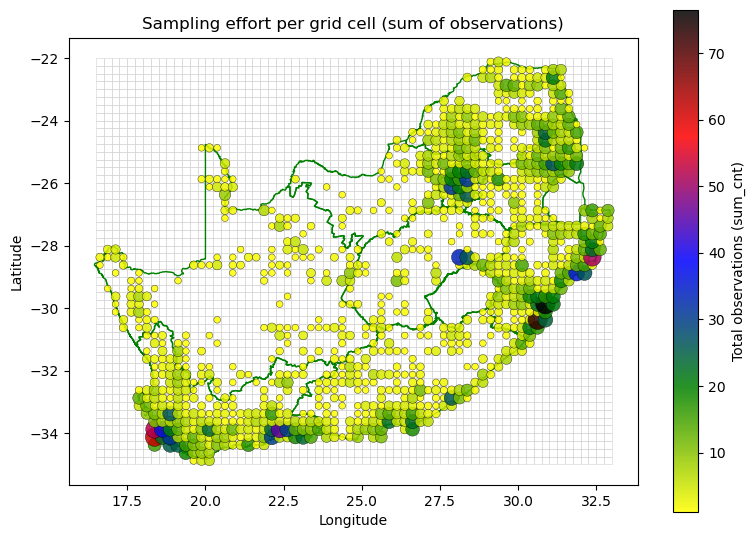

In [9]:
# ------------------------------------------------------------------
# 1.  Aggregate counts per grid-cell centroid -----------------------
cent_df = (grid_counts
           .groupby(['centroid_lat', 'centroid_lon'], as_index=False)['count']
           .sum()
           .rename(columns={'count': 'sum_cnt'}))
# ---------------------------------------------------------------
# 1.  Square-root–transform richness
cent_df["sqrt_sum_cnt"] = np.sqrt(cent_df["sum_cnt"])

# ------------------------------------------------------------------
# 2.  Custom colour ramp  (yellow→green→blue→red→black) -------------
cmap = LinearSegmentedColormap.from_list(
    "YGBRB", ["yellow", "green", "blue", "red", "black"], N=256)
norm = Normalize(vmin=cent_df.sqrt_sum_cnt.min(),
                 vmax=cent_df.sqrt_sum_cnt.max())

# 3.  Scale point sizes (area ∝ √count) -----------------------------
sizes = np.sqrt(cent_df.sqrt_sum_cnt)
sizes = sizes * 200 / sizes.max()          # tweak the 200 factor to taste

# ------------------------------------------------------------------
# 4.  Create figure/axes *before* adding layers ---------------------
fig, ax = plt.subplots(figsize=(8, 7))

# 5.  Grid & boundary outlines  -------------------------------------
grid_polys.to_crs("EPSG:4326").boundary.plot(
    ax=ax, color="lightgrey", linewidth=0.4, zorder=1)

boundary_gdf.to_crs("EPSG:4326").boundary.plot(
    ax=ax, color="green", linewidth=1.0, zorder=2)

# ------------------------------------------------------------------
# 6.  Centroid scatter ----------------------------------------------
sc = ax.scatter(
    cent_df.centroid_lon,
    cent_df.centroid_lat,
    s=sizes,
    c=cent_df.sqrt_sum_cnt,
    cmap=cmap,
    norm=norm,
    edgecolor="k",
    linewidth=0.3,
    alpha=0.85,
    zorder=3
)

# ------------------------------------------------------------------
# 7.  Cosmetics ------------------------------------------------------
ax.set_title("Sampling effort per grid cell (sum of observations)")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
ax.set_aspect("equal")

fig.colorbar(sc, ax=ax, shrink=0.75, label="Total observations (sum_cnt)")

plt.tight_layout()
plt.show()

---
#### 4.	SUMMARISE OCCURRENCES BY GRID ID
> Once the spatial structure is set, species records are aggregated to grid cells. This section describes the derivation of key biodiversity indicators at the grid-cell level.



##### 4.1.	Count total observations ~ Sampling effort
Calculate the number of records per grid cell. This metric approximates sampling effort and is useful for identifying areas with data biases or coverage gaps.


In [10]:
# prompt: Transpose the data.frame and sum species richness across years (columns)
# i.e. 'rounded_latitude' and 'rounded_longitude' will not be retained.
# And plot results as a line chart, showing how species_richness changes over time.
# Also include the total number of observations per year.

# Calculate total observations per year (Corrected)
obs_count = grid_counts.groupby(['centroid_lat', 'centroid_lon', 'year'])['count'].sum().unstack()
total_observations_per_year = obs_count.sum(axis=0)  # Sum across all locations for each year
total_observations_per_year.head(4)

year
1998     1.0
1999     1.0
2000    16.0
2001    29.0
dtype: float64

##### 4.2.	Calculate Species Richness
Count the number of unique species observed in each grid cell. Species richness is a basic but widely used indicator of biodiversity.


In [11]:
# prompt: Using dataframe summary:
# Now count the number of unique species by 'rounded_latitude' and 'rounded_longitude' and 'year'.
# The result should be a table with 'rounded_latitude' and 'rounded_longitude', and a
# column for each year with the count of unique species i.e. species richness per year.
# Also return zero instead of NaN for years without species.

# Group by rounded_latitude, rounded_longitude, and year, and count unique species
species_richness = grid_counts.groupby(['centroid_lat', 'centroid_lon', 'year'])['species'].nunique().unstack()

# Fill NaN values with 0
species_richness = species_richness.fillna(0)

# Display the resulting table
# print(species_richness)
species_richness.head(4)

year                       1998  1999  2000  2001  2002  2003  2004  2005  \
centroid_lat centroid_lon                                                   
-34.875      19.625         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
             19.875         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
             20.125         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
-34.625      19.375         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

year                       2006  2007  ...  2014  2015  2016  2017  2018  \
centroid_lat centroid_lon              ...                                 
-34.875      19.625         0.0   0.0  ...   0.0   0.0   0.0   0.0   0.0   
             19.875         0.0   0.0  ...   1.0   1.0   0.0   1.0   0.0   
             20.125         0.0   0.0  ...   0.0   2.0   0.0   2.0   0.0   
-34.625      19.375         0.0   1.0  ...   2.0   7.0   3.0   9.0  14.0   

year                       2019  2020  2021  2022  2023  
centroid_lat centroid_lon                                
-34.875      19.625         0.0   0.0   2.0   1.0   0.0  
             19.875         3.0   2.0   0.0   6.0   3.0  
             20.125         5.0   0.0   3.0   6.0  12.0  
-34.625      19.375        16.0  26.0  21.0  21.0  41.0  

[4 rows x 26 columns]

##### 4.3.	Results - Line charts
Plot time series or summary statistics (e.g. number of observations or richness) using line charts to explore trends across time or spatial resolution.


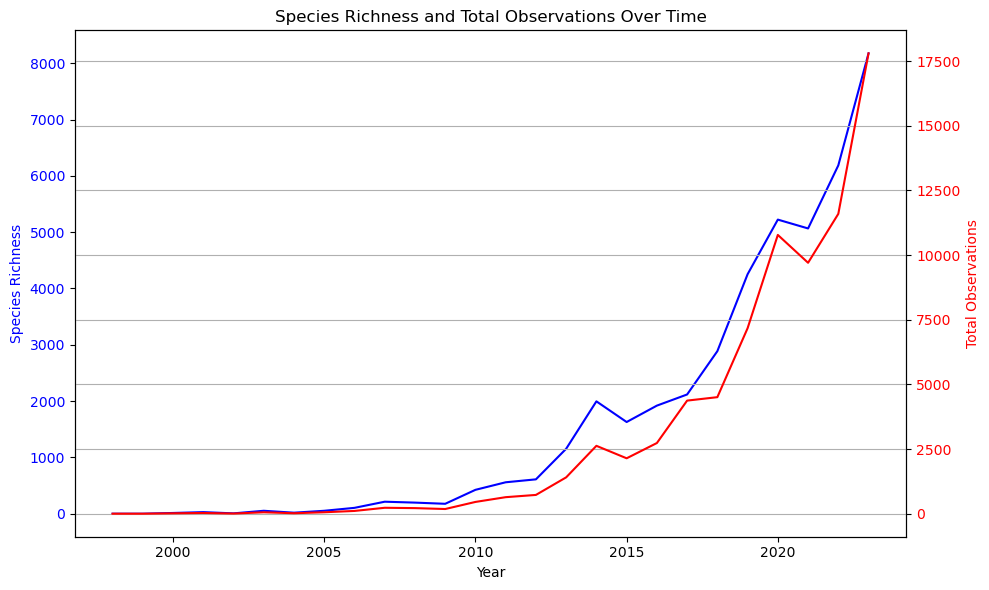

In [88]:
# prompt: Transpose the data.frame and sum species richness across years (columns)
# i.e. 'rounded_latitude' and 'rounded_longitude' will not be retained.
# And plot results as a line chart, showing how species_richness changes over time

# Reset the index to bring back 'qds_lat' and 'qds_lon' as columns
species_richness = species_richness.reset_index()

# Transpose the data and sum species richness across years
species_richness_transposed = species_richness.set_index(['centroid_lat', 'centroid_lon']).transpose()
species_richness_sum = species_richness_transposed.sum(axis=1)

# Filter out non-numeric index values before plotting
numeric_index = species_richness_sum.index[species_richness_sum.index.map(lambda x: isinstance(x, (int, float)))]
species_richness_sum_filtered = species_richness_sum[numeric_index]


# # Create a line chart of only Species Richness over time
# plt.figure(figsize=(10, 6))
# # Plot using the filtered data
# plt.plot(species_richness_sum_filtered.index, species_richness_sum_filtered.values)
# plt.xlabel('Year')
# plt.ylabel('Species Richness')
# plt.title('Species Richness Change Over Time')
# plt.grid(True)
# plt.show()

# Create a line chart with two lines: Species Richness and Total Observations
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Species Richness
ax1.plot(species_richness_sum_filtered.index, species_richness_sum_filtered.values, 'b-', label='Species Richness')
ax1.set_xlabel('Year')
ax1.set_ylabel('Species Richness', color='b')
ax1.tick_params('y', labelcolor='b')

# Create a second y-axis for Total Observations
ax2 = ax1.twinx()
ax2.plot(total_observations_per_year.index, total_observations_per_year.values, 'r-', label='Total Observations')
ax2.set_ylabel('Total Observations', color='r')
ax2.tick_params('y', labelcolor='r')

# Add title, grid, and legend
plt.title('Species Richness and Total Observations Over Time')
plt.grid(True)
fig.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

In [89]:
# 1 – See the first few roads?
print(species_richness_transposed.head())

# 2 – What kind of object?
type(species_richness_transposed)
# e.g. pandas.core.frame.DataFrame

# 3 – High-level structure
species_richness_transposed.info()      # rows, columns, dtypes, memory

# 4 – Dimensions and column data types
species_richness_transposed.shape       # (n_rows, n_cols)
species_richness_transposed.dtypes      # dtype of every column

# 5 – Column names (if you need them)
# list(species_richness_transposed.columns)

# 6 – Numeric summary (optional)
species_richness_transposed.describe().T

centroid_lat -34.875               -34.625                      -34.375  \
centroid_lon  19.625 19.875 20.125  19.375 19.625 19.875 20.125  18.375   
year                                                                      
1998             0.0    0.0    0.0     0.0    0.0    0.0    0.0     0.0   
1999             0.0    0.0    0.0     0.0    0.0    0.0    0.0     0.0   
2000             0.0    0.0    0.0     0.0    0.0    0.0    0.0     2.0   
2001             0.0    0.0    0.0     0.0    0.0    0.0    0.0     0.0   
2002             0.0    0.0    0.0     0.0    0.0    0.0    0.0     0.0   

centroid_lat                ... -22.375                                     \
centroid_lon 18.875 19.125  ...  29.375 29.875 30.125 30.375 30.875 31.125   
year                        ...                                              
1998            0.0    0.0  ...     0.0    0.0    0.0    0.0    0.0    0.0   
1999            0.0    0.0  ...     0.0    0.0    0.0    0.0    0.0    0.0   
2000     

count      mean        std  min  25%  50%  75%  \
centroid_lat centroid_lon                                                   
-34.875      19.625         26.0  0.115385   0.431455  0.0  0.0  0.0  0.0   
             19.875         26.0  0.692308   1.407671  0.0  0.0  0.0  1.0   
             20.125         26.0  1.153846   2.737770  0.0  0.0  0.0  0.0   
-34.625      19.375         26.0  6.230769  10.633185  0.0  0.0  0.0  8.5   
             19.625         26.0  2.230769   4.769132  0.0  0.0  0.0  2.0   
...                          ...       ...        ...  ...  ...  ...  ...   
-22.375      31.125         26.0  1.807692   4.882780  0.0  0.0  0.0  1.0   
             31.375         26.0  1.538462   3.962128  0.0  0.0  0.0  1.0   
-22.125      29.125         26.0  0.115385   0.431455  0.0  0.0  0.0  0.0   
             29.375         26.0  0.923077   2.057631  0.0  0.0  0.0  1.0   
             29.625         26.0  0.230769   0.992278  0.0  0.0  0.0  0.0   

                            max  
centroid_lat centroid_lon        
-34.875      19.625         2.0  
             19.875         6.0  
             20.125        12.0  
-34.625      19.375        41.0  
             19.625        23.0  
...                         ...  
-22.375      31.125        24.0  
             31.375        19.0  
-22.125      29.125         2.0  
             29.375         8.0  
             29.625         5.0  

[1025 rows x 8 columns]

##### 4.4.	Results – Static Map
Visualise spatial patterns of sampling effort and species richness using map outputs. These maps can reveal biodiversity hotspots and under-sampled areas.

In [12]:
# Build GeoDataFrame of points (always start in EPSG:4326)--------------------------
crs_wgs84 = "EPSG:4326"
gdf_pts = gpd.GeoDataFrame(grid_counts,
                           geometry=gpd.points_from_xy(grid_counts['centroid_lon'], 
                                                       grid_counts['centroid_lat']),
                                                       crs=crs_wgs84)
gdf_pts.head(4)

,grid_id,year,month,species,count,centroid_lon,centroid_lat,geometry
0,g_0_25,2021,6,Vanessa cardui,1,16.625,-28.625,POINT (16.62500 -28.62500)
1,g_0_26,2021,5,Vanessa cardui,2,16.625,-28.375,POINT (16.62500 -28.37500)
2,g_0_26,2022,11,Vanessa cardui,3,16.625,-28.375,POINT (16.62500 -28.37500)
3,g_10_10,2005,4,Gonimbrasia tyrrhea,1,19.125,-32.375,POINT (19.12500 -32.37500)


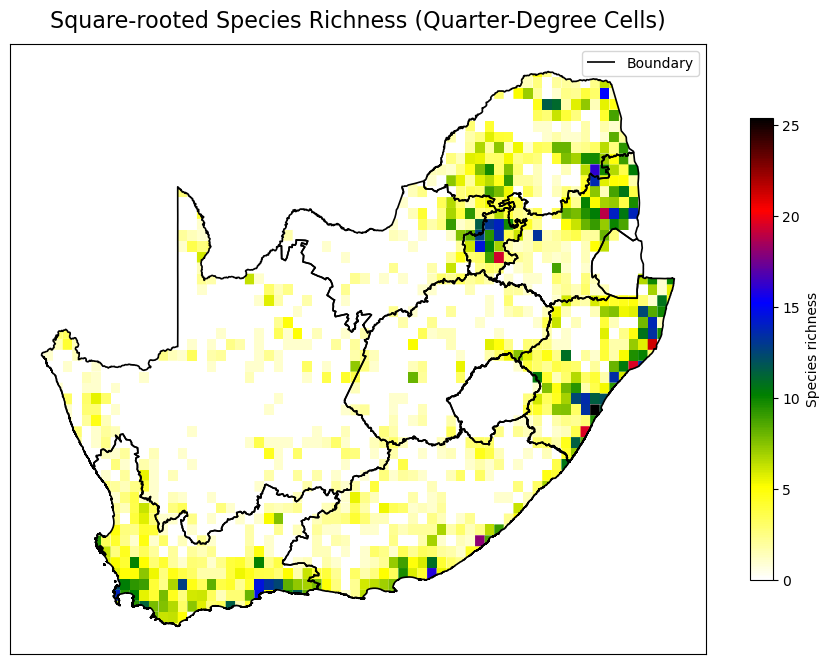

In [13]:
# ---------------------------------------------------------------------
# 1.  Same CRS for everything  -----------------------------------------
crs_wgs84 = "EPSG:4326"
grid_polys  = grid_polys.to_crs(crs_wgs84)
boundary_gdf = boundary_gdf.to_crs(crs_wgs84)
# gdf_pts = gdf_pts.to_crs(crs_wgs84)

# keep only the part of each cell that intersects the boundary
grid_clipped = gpd.overlay(
    grid_polys,                       # quarter-degree grid
    boundary_gdf[["geometry"]],       # national outline
    how="intersection"                # returns the intersecting polygons
)

# ---------------------------------------------------------------
# 2.  Square-root–transform richness
grid_clipped["spp_rich_sqrt"] = np.sqrt(grid_clipped["spp_rich"])

# ---------------------------------------------------------------
# 3.  Custom colour ramp (white-yellow-green-blue-red)
# my_colors = ["white", "yellow", "green", "blue", "red", "purple", "black"]
my_colors = ["white", "yellow", "green", "blue", "red", "black"]
my_cmap   = LinearSegmentedColormap.from_list("wygbr", my_colors, N=256)

# ---------------------------------------------------------------------
# 4.  Plot  -------------------------------------------------------------
fig, ax = plt.subplots(figsize=(9, 7))

# a) richness grid  (viridis _reversed_)
grid_clipped.plot(
    column="spp_rich_sqrt", # "spp_rich_sqrt",
    ax=ax,
    cmap=my_cmap,           # <- the “_r” variant flips the ramp
    linewidth=0,
    legend=True,
    legend_kwds={"label": "Species richness", "shrink": 0.7},
    vmin=0,
    vmax=grid_clipped.spp_rich_sqrt.max() # grid_clipped.spp_rich_sqrt.max()
)

# b) boundary outline (black, no fill)
boundary_gdf.boundary.plot(
    ax=ax, color="black", linewidth=1.2, label="Boundary"
)

# c) observation points (optional; light grey so grid colours dominate)
# gdf_pts.plot(ax=ax, markersize=4, color="white", edgecolor="grey", linewidth=0.3, alpha=0.7)

# ---------------------------------------------------------------------
# 5.  Cosmetic tweaks  -------------------------------------------------
ax.set_title("Square-rooted Species Richness (Quarter-Degree Cells)",
             fontsize=16, pad=12)
ax.set_xlabel("")      # no ticks
ax.set_ylabel("")
ax.set_xticks([])
ax.set_yticks([])
ax.legend(loc="upper right")

# optional: add a scalebar and/or basemap
# ScaleBar requires the axis to be in projected metres; quick hack:
# scale_ax = ax.inset_axes([0.02, 0.05, 0.25, 0.01])
# scalebar = ScaleBar(dx=1, units="m", dimension="si-length")
# scale_ax.add_artist(scalebar); scale_ax.set_axis_off()
#
# cx.add_basemap(ax, crs=crs_wgs84, zoom=6, source=cx.providers.Stamen.TerrainBackground)

plt.tight_layout()
plt.show()

In [ ]:
import rasterio
from rasterio.features import rasterize
from affine import Affine
import numpy as np

# ---------------------------------------------------------------
# 2.  Square-root–transform richness
grid_polys["spp_rich_sqrt"] = np.sqrt(grid_polys["spp_rich"])

# 1. Define your output grid:
xmin, ymin, xmax, ymax = grid_polys.total_bounds
n_cols = 500  # or whatever resolution you need
n_rows = int(n_cols * (ymax-ymin)/(xmax-xmin))
transform = Affine((xmax-xmin)/n_cols, 0, xmin,
                   0, -(ymax-ymin)/n_rows, ymax)

# 2. Build (geometry, value) pairs
shapes = (
    (geom, value) for geom, value in 
    zip(grid_polys.geometry, grid_polys['spp_rich_sqrt'])
)

# 3. Rasterize to an array
arr = rasterize(
    shapes,
    out_shape=(n_rows, n_cols),
    transform=transform,
    fill=0,
    dtype='float32'
)

# 4. Save to disk
with rasterio.open(
    "data/spp_rich_sqrt.tif", "w",
    driver="GTiff",
    height=n_rows, width=n_cols,
    count=1, dtype=arr.dtype,
    crs="EPSG:4326",
    transform=transform
) as dst:
    dst.write(arr, 1)




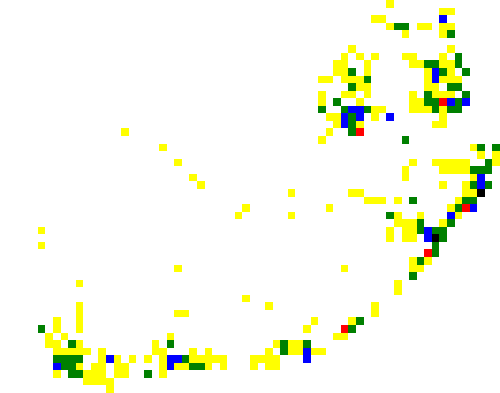

In [21]:
import rasterio
import numpy as np
import folium
from folium.raster_layers import ImageOverlay
import matplotlib.colors as mcolors

# 1. Read your GeoTIFF ----------------------------------------------------------------
with rasterio.open("data/spp_rich_sqrt.tif") as src:
    data = src.read(1)
    bounds = src.bounds

# 2. Build a Matplotlib ListedColormap & normalize ------------------------------------
my_colors = ["white", "yellow", "green", "blue", "red", "black"]
cmap = mcolors.ListedColormap(my_colors)
norm = mcolors.Normalize(vmin=data.min(), vmax=data.max())

# 3. Map data → RGBA array ------------------------------------------------------------
#    This gives an (H, W, 4) array with values in [0,1]
rgba_img = cmap(norm(data))

# 4. Flip so north is up --------------------------------------------------------------
#    NOTE: If your raster is already north-up you can skip this.
# rgba_img = np.flipud(rgba_img)

# 5. Create the map and overlay -------------------------------------------------------
m = folium.Map(
    location=[ (bounds.top + bounds.bottom)/2,
               (bounds.left + bounds.right)/2 ],
    zoom_start=6
)

ImageOverlay(
    image=rgba_img,
    bounds=[[bounds.bottom, bounds.left],
            [bounds.top,    bounds.right]],
    # origin='lower',              # treat first row as southern edge
    opacity=0.7,
    name="√ Species Richness"
).add_to(m)

folium.LayerControl().add_to(m)
m



---
#### 5.	CREATE YOUR FIRST DATA CUBES
> In this section, participants will construct biodiversity data cubes—structured as three-dimensional arrays that integrate space, time, and ecological variables. Each cube captures how a specific biodiversity metric (e.g. sampling effort or species richness) varies across geographic locations (latitude × longitude) over multiple time steps (e.g. years or months). This structure allows for efficient storage, querying, and analysis of large spatiotemporal datasets.
> As illustrated in the image, the data cube is organised with spatial layers (rows and columns representing grid cells) stacked across a time axis (e.g. Year 1 to Year 5). Each “slice” of the cube represents a complete spatial layer for one time step, and the full cube enables users to trace changes through time at any given location or across the entire landscape.
Visualisation plays a key role in understanding and communicating these dynamics. Once the cube is built, maps and animated plots can be used to display how biodiversity indicators change over time and space. This can reveal trends such as increasing sampling effort in certain areas, emerging biodiversity hotspots, or declining richness in response to environmental pressures.



##### 5.1.	Spatio-Temporal Data Cube >> Sampling Effort
Here, participants will build a data cube that records the number of occurrence records (i.e. sampling effort) for each grid cell in each time period. Each layer in the cube corresponds to a different year or time step, and each cell holds the count of records observed in that space-time unit. This cube helps identify spatial sampling biases and temporal coverage gaps.
Visualization of this cube can include animated heatmaps or time-series plots that show changes in sampling intensity across the landscape and over time. These outputs are useful for diagnosing data quality and guiding future sampling campaigns.


In [92]:
# Group by rounded_latitude, rounded_longitude, and year, and count unique species
obs_cnt = grid_counts.groupby(['grid_id' ,'centroid_lat', 'centroid_lon', 'year'])['count'].sum().unstack()

# Fill NaN values with 0
obs_cnt = obs_cnt.fillna(0)

# Display the resulting table
obs_cnt.head(4)

,,year,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
grid_id,centroid_lat,centroid_lon,,,,,,,,,,,,,,,,,,,,,
g_0_25,-28.625,16.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
g_0_26,-28.375,16.625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0
g_10_10,-32.375,19.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,3.0,10.0,9.0,12.0,4.0,8.0,6.0,0.0
g_10_11,-32.125,19.125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,10.0,6.0,2.0,5.0,7.0,4.0,0.0,13.0,11.0


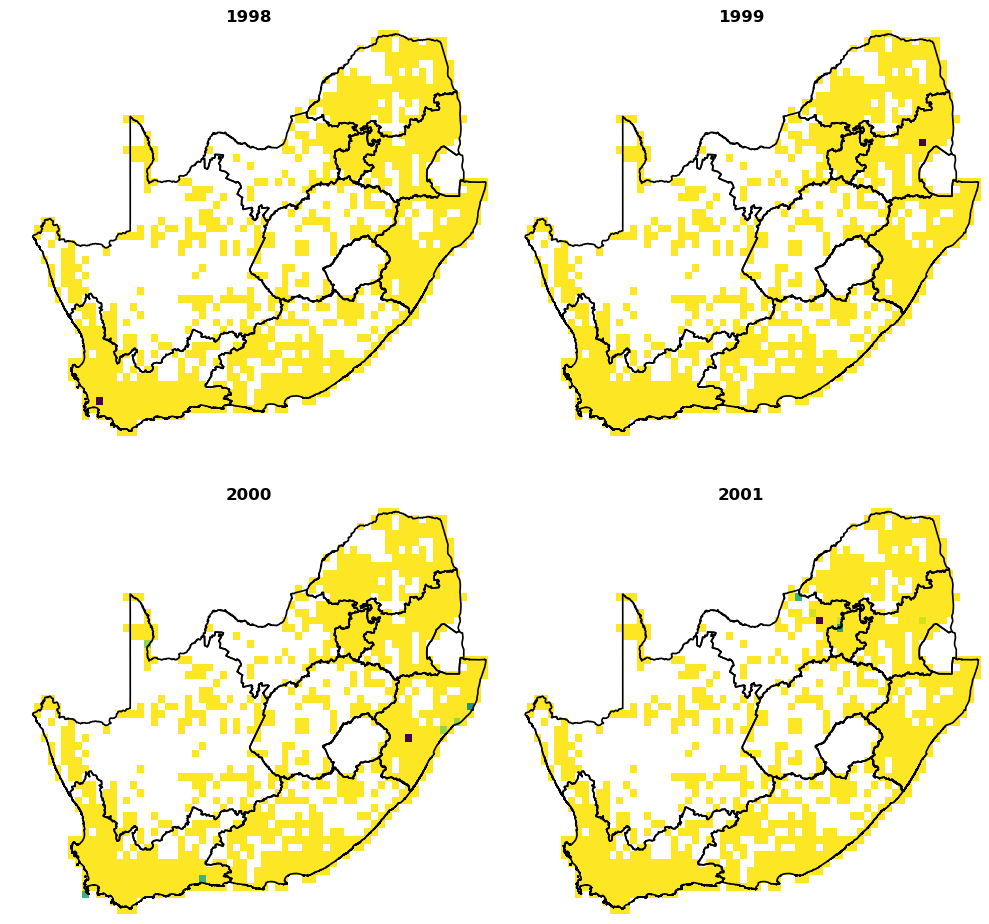

In [ ]:
# ------------------------------------------------------------------
# 1.  Join the tabular data to the polygons ------------------------
#     (drops the centroid columns; they were only metadata here)
years = list(range(1998, 2024))  # 1998–2023 inclusive
gpObs = (grid_polys
      .set_index('grid_id')
      .join(obs_cnt))

# ------------------------------------------------------------------
# 2.  Derive grid geometry (origin, pixel size, array shape) -------
minx, miny, maxx, maxy = gpObs.total_bounds
dx = gpObs.geometry.iloc[0].bounds[2] - gpObs.geometry.iloc[0].bounds[0]   # cell width
dy = gpObs.geometry.iloc[0].bounds[3] - gpObs.geometry.iloc[0].bounds[1]   # cell height
transform = from_origin(minx, maxy, dx, dy)
width  = int(np.round((maxx - minx) / dx))
height = int(np.round((maxy - miny) / dy))

# ------------------------------------------------------------------
# 3.  Rasterise one 2-D array per year -----------------------------
nodata = -9999.0     # pick any nodata flag that will never occur in your data
arraysObs = {}
for yr in years:
    shapes = ((geom, value) for geom, value in zip(gpObs.geometry, gpObs[yr]))
    arrObs = rasterize(
        shapes=shapes,
        out_shape=(height, width),
        transform=transform,
        fill=nodata,
        dtype='float32')
    arraysObs[yr] = arrObs

# --- Preview the first 4 layers with boundary & transparency --------------
preview_years = years[:4]                       # 1998-2001
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for ax, yr in zip(axes.flat, preview_years):
    # (a) mask nodata so it draws with alpha = 0
    masked = np.ma.masked_equal(arraysObs[yr], nodata)

    # (b) plot the raster
    show(masked,
         transform=transform,
         ax=ax,
         cmap='viridis_r',
         title=str(yr),
         vmin=0,
         vmax=max(masked.max(), 1))             # keep common colour scale

    # (c) overlay the boundary (no fill, black outline)
    boundary_gdf.boundary.plot(
        ax=ax,
        color='black',
        linewidth=1.2,
        label='Boundary'
    )

    ax.set_axis_off()                           # optional: remove tick marks

plt.tight_layout()
plt.show()    

In [94]:
# ------------------------------------------------------------------
# 4.  Write multi-band GeoTIFF, masking outside the boundary -------
obs_tif = 'data/sampling_effort_1998_2023_masked.tif'
with rasterio.open(
        obs_tif,
        'w',
        driver='GTiff',
        width=width,
        height=height,
        count=len(years),
        crs=gpObs.crs,
        transform=transform,
        dtype='float32',
        nodata=nodata,
        compress='lzw') as dstObs:

    for i, yr in enumerate(years, start=1):
        # keep values >0 inside boundary; everything else → nodata
        valid = (mask) & (arraysObs[yr] > 0)
        clipped = np.where(valid, arraysObs[yr], nodata).astype('float32')

        dstObs.write(clipped, i)
        dstObs.set_band_description(i, str(yr))

print(f"✓ Wrote masked GeoTIFF {obs_tif} (values ≤0 set to nodata)")

✓ Wrote masked GeoTIFF data/sampling_effort_1998_2023_masked.tif (values ≤0 set to nodata)


##### 5.2.	Spatio-Temporal Data Cube >> Species Richness
This cube stores species richness values (i.e. the number of unique species recorded) for each grid cell over multiple time steps. It enables users to explore biodiversity patterns across both spatial and temporal dimensions, facilitating the detection of shifts in species composition, local extinctions, or emerging biodiversity hotspots.
Visual outputs from this cube may include interactive maps, animated sequences, or 3D plots showing how richness evolves over time. These tools support interpretation of complex spatiotemporal patterns and are valuable for ecological forecasting, conservation prioritisation, and communicating results to stakeholders.

In [ ]:
# Group by rounded_latitude, rounded_longitude, and year, and count unique species
spp_rich = grid_counts.groupby(['grid_id' ,'centroid_lat', 'centroid_lon', 'year'])['species'].nunique().unstack()

# Fill NaN values with 0
spp_rich = spp_rich.fillna(0)

# Display the resulting table
# print(spp_rich)
spp_rich.head(4)

In [ ]:
# ------------------------------------------------------------------
# 1.  Join the tabular data to the polygons ------------------------
#     (drops the centroid columns; they were only metadata here)
years = list(range(1998, 2024))  # 1998–2023 inclusive
gp = (grid_polys
      .set_index('grid_id')
      .join(spp_rich))

# ------------------------------------------------------------------
# 2.  Derive grid geometry (origin, pixel size, array shape) -------
minx, miny, maxx, maxy = gp.total_bounds
dx = gp.geometry.iloc[0].bounds[2] - gp.geometry.iloc[0].bounds[0]   # cell width
dy = gp.geometry.iloc[0].bounds[3] - gp.geometry.iloc[0].bounds[1]   # cell height
transform = from_origin(minx, maxy, dx, dy)
width  = int(np.round((maxx - minx) / dx))
height = int(np.round((maxy - miny) / dy))

# ------------------------------------------------------------------
# 3.  Rasterise one 2-D array per year -----------------------------
nodata = -9999.0     # pick any nodata flag that will never occur in your data
arrays = {}
for yr in years:
    shapes = ((geom, value) for geom, value in zip(gp.geometry, gp[yr]))
    arr = rasterize(
        shapes=shapes,
        out_shape=(height, width),
        transform=transform,
        fill=nodata,
        dtype='float32')
    arrays[yr] = arr


In [ ]:
# --- Preview the first 4 layers with boundary & transparency --------------
preview_years = years[:4]                       # 1998-2001
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for ax, yr in zip(axes.flat, preview_years):
    # (a) mask nodata so it draws with alpha = 0
    masked = np.ma.masked_equal(arrays[yr], nodata)

    # (b) plot the raster
    show(masked,
         transform=transform,
         ax=ax,
         cmap='viridis_r',
         title=str(yr),
         vmin=0,
         vmax=max(masked.max(), 1))             # keep common colour scale

    # (c) overlay the boundary (no fill, black outline)
    boundary_gdf.boundary.plot(
        ax=ax,
        color='black',
        linewidth=1.2,
        label='Boundary'
    )

    ax.set_axis_off()                           # optional: remove tick marks

plt.tight_layout()
plt.show()

In [ ]:
# # ------------------------------------------------------------------
# # 4.  Write multi-band GeoTIFF -------------------------------------
# out_tif = 'data/species_richness_1998_2023.tif'
# with rasterio.open(
#         out_tif,
#         'w',
#         driver='GTiff',
#         width=width,
#         height=height,
#         count=len(years),
#         crs=gp.crs,
#         transform=transform,
#         dtype='float32',
#         nodata=nodata,
#         compress='lzw') as dst:
#     for i, yr in enumerate(years, start=1):
#         dst.write(arrays[yr], i)
#         dst.set_band_description(i, str(yr))

# print(f"✓ Wrote {out_tif} with {len(years)} bands.")

# ------------------------------------------------------------------
# 3·bis  Build a geometry mask from boundary_gdf -------------------
#        (run after Step 3, before Step 4)

# 3.1  Ensure both layers share a CRS
boundary_aligned = boundary_gdf.to_crs(gp.crs)

# 3.2  True inside the boundary, False outside
mask = geometry_mask(
    boundary_aligned.geometry,
    out_shape=(height, width),
    transform=transform,
    invert=True)          # invert=True ⇒ mask is True *inside*

# ------------------------------------------------------------------
# 4.  Write multi-band GeoTIFF, masking outside the boundary -------
out_tif = 'data/species_richness_1998_2023_masked.tif'
with rasterio.open(
        out_tif,
        'w',
        driver='GTiff',
        width=width,
        height=height,
        count=len(years),
        crs=gp.crs,
        transform=transform,
        dtype='float32',
        nodata=nodata,
        compress='lzw') as dst:

    for i, yr in enumerate(years, start=1):
        # keep values >0 inside boundary; everything else → nodata
        valid = (mask) & (arrays[yr] > 0)
        clipped = np.where(valid, arrays[yr], nodata).astype('float32')

        dst.write(clipped, i)
        dst.set_band_description(i, str(yr))

print(f"✓ Wrote masked GeoTIFF {out_tif} (values ≤0 set to nodata)")

---
#### 6.	GET ENVIRONMENTAL COVARIATES
> Environmental covariates—such as temperature, precipitation, elevation, vegetation productivity, and human population density—are critical for understanding the patterns and processes underlying biodiversity. These variables influence species distributions, community composition, and ecological dynamics across spatial and temporal scales. Capturing them as Data Cubes enables the integration of environmental context into biodiversity analyses, providing consistent, multi-layered inputs for modelling and monitoring. Each variable takes a different structural form depending on their dimensions. Elevation is a simple 3D matrix with two spatial dimensions (latitude and longitude) and one variable (elevation), but no temporal component. In contrast, WorldClim’s bioclimatic variables form a multi-dimensional matrix or spatial data cube, consisting of spatial dimensions and multiple variables (e.g. BIO1 to BIO19), but still static in time. Meanwhile, variables like NDVI, rainfall, and surface water are true spatio-temporal data cubes—they include latitude, longitude, and time dimensions, with one variable per cube (e.g. NDVI index, precipitation in mm, or water presence/absence).
> Each cube encodes changes in an environmental variable across geographic space and time, allowing researchers to assess ecological responses to climate variability, habitat change, and anthropogenic pressures. These cubes are essential for linking biodiversity observations to their environmental drivers.



##### 6.0.	Country Boundaries
[LSIB 2017: Large Scale International Boundary Polygons, Simplified](https://developers.google.com/earth-engine/datasets/catalog/USDOS_LSIB_SIMPLE_2017) is a simplified version of the detailed LSIB (2013) derived from two other datasets: a LSIB line vector file and the World Vector Shorelines (WVS) from the National Geospatial-Intelligence Agency (NGA). Compared with the detailed LSIB, in this simplified dataset some disjointed regions of each country have been reduced to a single feature. Furthermore, it excludes medium and smaller islands. The resulting simplified boundary lines are rarely shifted by more than 100 meters from the detailed LSIB lines. Each of the 312 features is a part of the geometry of one of the 284 countries described in this dataset.

In [27]:
# Define the region of interest (ROI) as South Africa
# south_africa = ee.FeatureCollection('USDOS/LSIB_SIMPLE/2017') \
#                 .filter(ee.Filter.inList('country_na', ['South Africa','Lesotho','Swaziland']))
south_africa = ee.FeatureCollection("projects/ee-biomath/assets/rsa_boundary")
aoi = south_africa.bounds()

##### 6.1.	Elevation
[NASADEM: NASA 30m Digital Elevation Model](https://developers.google.com/earth-engine/datasets/catalog/NASA_NASADEM_HGT_001) is an enhanced 30-meter digital elevation model based on reprocessed Shuttle Radar Topography Mission (SRTM) data. Improvements include void-filling and error correction using auxiliary datasets such as ASTER GDEM, ICESat GLAS, and PRISM. The product represents elevation surfaces collected around 2000, offering accurate topographic information globally. Elevation data are essential for modeling terrain-driven processes such as hydrology, erosion, and species distributions. Derived products include slope, aspect, and hillshade, which are valuable inputs in environmental modeling, remote sensing, and biodiversity research in topographically complex landscapes.


In [ ]:
# -- Elevation image: NASADEM
elev = ee.Image('NASA/NASADEM_HGT/001').select('elevation').clip(south_africa)

elev_vis = {'min': 0, 'max': 2000,
            'palette': ['#081d58', '#253494', '#225ea8',
                        '#1d91c0', '#41b6c4', '#7fcdbb',
                        '#c7e9b4', '#edf8b1', '#ffffd9']}

# -- Build interactive map
# Display results using geemap
m = geemap.Map()
m.centerObject(south_africa, 5)

# -- Basemap gallery (a few common ones are added as convenience methods)
m.add_basemap("ROADMAP")    # default
# m.add_basemap("HYBRID", False)
# m.add_basemap("TERRAIN", False)

# -- Elevation layer
m.addLayer(elev, elev_vis, "Elevation (m)")

# -- Boundary outline (no fill)
# m.add_gdf(boundary_gdf, layer_name="Boundary",
#           style={'fillOpacity': 0, 'color': 'black', 'weight': 2})
m.addLayer(south_africa, {}, "South Africa (Lesotho & eSwatini)", False)
m

Map(center=[-28.955600141297953, 25.361132832992634], controls=(WidgetControl(options=['position', 'transparen…

In [ ]:
# --- Export to a local GeoTIFF via geemap --------------------------
out_tif = 'data/elevation_nasadem.tif'  # choose your path
geemap.ee_export_image(          # ← note: no `image=` keyword here
    elev,                        # 1st arg = ee.Image to export
    filename     = out_tif,
    region       = south_africa.geometry(),
    scale        = 5000,           # NASADEM native resolution is 30m
    crs          = "EPSG:4326",
    file_per_band=False
)

print("✓ Elevation GeoTIFF saved →", out_tif)

Generating URL ...
Please wait ...
Data downloaded to d:\Courses_Workshops\NITheCS_Mini-School\notebooks\data\elevation_nasadem.tif
✓ Elevation GeoTIFF saved → data/elevation_nasadem.tif


##### 6.2.	Human Population
[LandScan Population Data Global 1km]( https://developers.google.com/earth-engine/datasets/catalog/projects_sat-io_open-datasets_ORNL_LANDSCAN_GLOBAL) provides a high-resolution global population dataset developed by Oak Ridge National Laboratory. It uses census data, satellite imagery, land use, and infrastructure to estimate population distribution at ~1 km resolution (30 arc-seconds). LandScan models ambient population, representing the average presence over 24 hours rather than residential counts. It is widely used in disaster risk reduction, epidemiology, and conservation planning, particularly in assessing human pressures on ecosystems. The spatial granularity supports integration with environmental and socio-economic models, making it useful for global sustainability and spatial decision-making studies.


In [ ]:
# -- LandScan Population Data Global 1km
landscan_global = ee.ImageCollection('projects/sat-io/open-datasets/ORNL/LANDSCAN_GLOBAL')

pop_vis = {'min': 0, 'max': 4200,
            'palette': ['#CCCCCC', '#FFFFBE', '#FEFF73', '#FEFF2C',
                         '#FFAA27', '#FF6625', '#FF0023', '#CC001A', '#730009']}

# -- Add to interactive map
m.addLayer(landscan_global.mean().clip(south_africa), pop_vis, "Population")
m

Map(bottom=5085.0, center=[-28.9600886880068, 25.356445312500004], controls=(WidgetControl(options=['position'…

##### 6.3.	Roads
[Global Roads Inventory Project (GRIP) global roads database](https://gee-community-catalog.org/projects/grip/) was developed to provide a more recent and consistent global roads dataset for use in global environmental and biodiversity assessment models like GLOBIO. The GRIP dataset consists of global and regional vector datasets in ESRI filegeodatabase and shapefile format, and global raster datasets of road density at a 5 arcminutes resolution (~8km x 8km). The GRIP dataset is mainly aimed at providing a roads dataset that is easily usable for scientific global environmental and biodiversity modelling projects. The dataset is not suitable for navigation. GRIP4 is based on many different sources (including OpenStreetMap) and to the best of our ability we have verified their public availability, as a criteria in our research. The UNSDI-Transportation datamodel was applied for harmonization of the individual source datasets. 


In [39]:
# -- Global Roads Inventory Project global roads database
grip4_africa = ee.FeatureCollection("projects/sat-io/open-datasets/GRIP4/Africa")
# print('Grip4 Africa size',grip4_africa.size())

# Clip each feature in the FeatureCollection to the geometry
grip4_rsa = grip4_africa.filterBounds(south_africa.bounds())

# -- Add to interactive map
m.addLayer(grip4_rsa,{},'RSA Roads')
m

Map(bottom=5124.0, center=[-30.44867367928756, 13.3154296875], controls=(WidgetControl(options=['position', 't…

##### 6.4.	Bioclimatic Variables
[WorldClim V1 Bioclim](https://developers.google.com/earth-engine/datasets/catalog/WORLDCLIM_V1_BIO) provides 19 biologically meaningful variables derived from monthly temperature and precipitation data, capturing seasonality, variability, and limiting climatic factors. These variables are frequently used in species distribution modeling, ecological niche modeling, and biodiversity assessments. Covering the period 1960–1991, this dataset offers a spatial resolution of approximately 927.67 meters. The dataset supports ecological and climate-related analyses across various scales and has become a standard reference for correlating climate with biological processes. The variables include annual means, seasonality indices, and extreme temperature/precipitation metrics relevant for understanding climatic constraints on species and ecosystems.


##### 6.5.	Vegetation Greeness
[MOD13A3.061 Vegetation Indices Monthly L3 Global 1 km SIN Grid]( https://developers.google.com/earth-engine/datasets/catalog/MODIS_061_MOD13A3) provides monthly global vegetation indices at 1 km resolution. This product includes NDVI and EVI, derived from daily MODIS observations (MOD13A2) using a weighted temporal average. These indices reflect vegetation condition, biomass, and photosynthetic activity. NDVI is sensitive to chlorophyll content, while EVI minimizes atmospheric and canopy background effects. MOD13A3 is widely used in land cover monitoring, phenology, productivity modeling, and change detection. Applications range from local to global scales in climate-ecological studies, agricultural monitoring, and habitat suitability analyses. The dataset enables consistent long-term vegetation assessment across varied biomes.


##### 6.7.	Rainfall
[CHIRPS Pentad: Climate Hazards Center InfraRed Precipitation With Station Data v2.0](https://developers.google.com/earth-engine/datasets/catalog/UCSB-CHG_CHIRPS_PENTAD) offers a 30+ year quasi-global rainfall dataset combining satellite-derived precipitation estimates with station data. Available at 0.05° (~5 km) resolution, CHIRPS provides temporally consistent data suitable for monitoring rainfall patterns and detecting anomalies. It is especially useful in regions with sparse gauge coverage, offering reliable inputs for drought monitoring, agricultural planning, hydrological modeling, and climate trend analysis. The pentad format aggregates rainfall over 5-day intervals, balancing temporal resolution with data stability. CHIRPS has been widely adopted in food security and climate vulnerability applications, particularly across the tropics and subtropics.


##### 6.7.	Surface Water
[JRC Yearly Water Classification History, v1.4 ]( https://developers.google.com/earth-engine/datasets/catalog/JRC_GSW1_4_YearlyHistory) provides annual classifications of surface water presence from 1984 to 2021. Based on over 4.7 million Landsat scenes (5, 7, and 8), this dataset classifies each pixel by water occurrence, seasonality, and change dynamics. The product enables high-resolution analysis of long-term trends in surface water extent, supporting studies in hydrology, climate change, wetland loss, and freshwater conservation. It includes year-by-year records and two reference epochs (1984–1999, 2000–2021), facilitating change detection over time. Water pixels are identified using a rule-based classification system, providing reliable global coverage for water monitoring applications.

---
#### 7.	INTERACTIVE MAPPING
> Interactive mapping is a key component of biodiversity analysis, enabling users to explore spatial patterns in species distributions, environmental variables, and ecological indicators. Python libraries such as geemap, folium, and leaflet provide user-friendly interfaces for building dynamic web-based maps.
> 
> -   `geemap` integrates seamlessly with Google Earth Engine, allowing users to overlay large-scale remote sensing and environmental datasets alongside species occurrence data.
> -   `folium`, built on `Leaflet.js`, supports lightweight, customizable maps with features like pop-ups, layer controls, and time sliders.
> -   `leaflet` (accessed via `R` or `JavaScript`) offers flexible, high-performance map rendering ideal for dashboard applications and spatial storytelling.
> 
> These tools make it easy to visualise biodiversity data cubes, track temporal changes, and communicate results interactively.


---
#### 8.	LINK OCCURRENCE RECORDS TO ENVIRONMENTAL VARIABLES
> This section focuses on enriching species occurrence data by linking it to relevant environmental variables at corresponding spatial locations. By sampling raster-based environmental layers (e.g. rainfall, vegetation indices) at the centroids of grid cells or observation points, we create a unified dataset that combines biodiversity and environmental information. This spatial join enables the analysis of how species patterns vary with underlying environmental gradients.
> The process involves converting aggregated occurrence records into a spatial format (e.g. a `FeatureCollection`), and then extracting values from remote sensing-derived rasters (such as CHIRPS rainfall or MODIS NDVI) at each point location. The result is a structured table where each row represents a spatial unit, annotated with both the number of species observations and associated environmental values. This dataset forms the basis for subsequent modelling and interpretation of ecological processes.


---
#### 9.	MODELLING RELATIONSHIPS
> With our biodiversity and environmental data cubes in place, we now turn to explaining how and why patterns emerge. Four case studies illustrate a spectrum of modelling strategies matched to specific ecological questions and data structures:
> 
> -   **Climate–vegetation coupling (9.1)**: A Random-Forest regression in Google Earth Engine captures the highly non-linear, lagged response of NDVI to rainfall, producing per-pixel error estimates and scalable, cloud-native predictions.
> -   **Accessibility bias (9.2)**: A Generalised Additive Model with a negative-binomial family flexibly models over-dispersed sampling-effort counts as a smooth function of distance-to-roads, revealing the shape and strength of accessibility effects.
> -   **Drivers of species richness (9.3)**: Gradient-Boosted Decision Trees (XGBoost) handle complex, interacting predictors. Feature importance scores and SHAP values rank climatic, topographic, and anthropogenic drivers, providing transparent insight into richness hotspots.
> -   **Observer bias correction (9.4)**: A hierarchical occupancy-detection model separates true species occurrence from imperfect detection by incorporating effort and accessibility covariates in the detection sub-model, yielding bias-adjusted distribution estimates.
> 
> Across all case studies, participants will learn to export predictor stacks from Earth Engine, fit and validate models in Python, quantify uncertainty through cross-validation or Bayesian posterior summaries, and return spatially explicit predictions to Earth Engine for interactive visualisation. By the end of this module, you will be able to select appropriate modelling frameworks, interpret key ecological drivers, and communicate results through reproducible, data-cube-based workflows.


##### 9.1.	Predicting NDVI from rainfall 
Random-Forest regression ` smileRandomForest` handles non-linear, lagged, and threshold responses between rainfall and vegetation greenness without parametric assumptions; runs natively in GEE, scales to multi-year image collections, and provides per-pixel error estimates for map-based validation.



##### 9.2.	Effect of distance-to-roads on sampling effort 
Generalised Additive Model (GAM) model with a negative-binomial family because our sampling effort is over-dispersed count data that often shows a smooth, non-monotonic response to accessibility. A GAM fitted in Python (`pyGAM` or `statsmodels.gam`) uses spline terms to flexibly model the distance-to-road curve while the negative-binomial distribution accounts for extra-Poisson variance. Distance rasters exported from GEE serve as predictors.


##### 9.3.	Key drivers of species diversity 
Gradient-Boosted Decision Trees (XGBoost) handles complex, non-additive effects of multiple environmental covariates on species richness; built-in feature importance and SHAP values support transparent driver ranking. Predictor stacks are sampled from GEE and modelled in Python (`xgboost`, `scikit-learn`).


##### 9.4.	Compensating for observer bias
Single-season occupancy-detection model (hierarchical Bayesian, e.g. `PyMC` or `pystan`) because it’s able to separate true occurrence from detection probability by including effort, observer identity, or accessibility covariates in the detection sub-model. Bias surfaces created in GEE feed into the model, providing effort-corrected distribution estimates.

---
#### 10.	INTERPRET RESULTS AND MAP PREDICTIONS
> The final step translates model outputs into ecological insight and actionable spatial products. Begin by examining goodness-of-fit diagnostics—cross-validated RMSE, deviance, or posterior predictive checks—to judge model credibility. Next, interrogate driver importance and response curves: feature importance scores, SHAP values, or partial-dependence plots reveal how each environmental covariate shapes biodiversity patterns.
> Predicted surfaces and their uncertainties are then exported back to Google Earth Engine and rendered with geemap or folium. Interactive layers allow users to toggle between baseline predictions, scenario maps, and confidence intervals, facilitating rapid exploration of hotspots, refugia, or data-poor areas. Complex temporal outputs (e.g. yearly richness trends) can be animated to show change through time, while static high-resolution maps are generated for reports and policy briefs.
> Finally, link these visualisations to conservation objectives—such as identifying priority sampling gaps, forecasting climate-driven shifts, or evaluating management interventions—ensuring that data-cube analyses inform real-world biodiversity decisions.


# XXXX - WORKING CODE - XXXX